## Only to run once during one session

In [1]:
## importing all libraries and dependencies
import pandas as pd
import numpy as np
import os
from os import listdir
import glob
from os.path import isfile, join
import shutil
import PIL
from PIL import Image
import random
import math
from heapq import merge
from random import *
import scipy as sp
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
pt_SM = []
ls_runSM = []

In [3]:
data_dir = '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/SONA_data-selected/SONA_data/'
dir_ext = [f for f in listdir(data_dir)]
pt_dir_lst = []
for i in dir_ext:
    pt_dir = data_dir + i
    pt_dir_lst.append(pt_dir)

In [4]:
pt_dir_lst

['/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/SONA_data-selected/SONA_data/emt_32',
 '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/SONA_data-selected/SONA_data/emt_33']

## For each participant

In [7]:
#pt_dir = pt_dir_lst[0]
pt_dir

'/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/SONA_data-selected/SONA_data/emt_33'

In [8]:
encoding_files = []
tempdist_files = []
srcmem_files = []
for pt in pt_dir:
    #pt_dir = pt_dir_lst[:]
    pt_files = [f for f in listdir(pt_dir) if isfile(join(pt_dir, f))]

for a in pt_files:
    if a[-4:] == '.csv' and 'encoding' in a:
        encoding_files.append(pt_dir + '/' + a)
    if a[-4:] == '.csv' and 'temp_dist' in a:
        tempdist_files.append(pt_dir + '/' + a)
    if a[-4:] == '.csv' and 'src_mem' in a:
        srcmem_files.append(pt_dir + '/' + a)

In [9]:
#1 add in column for pt number and run number
#2 concat all the run csvs for each test
#3 drop NAs
len(pt_files)

48

In [10]:
srcmemdf = []
rn1 = srcmem_files[0]
dt1 = pd.DataFrame(pd.read_csv(rn1, header = 0))
dt1.columns = dt1.columns.str.replace(".", "_")
dt1['run_num'] = '1'
pt_num = dt1.participant[2]
type(dt1)
srcmemdf.append(dt1)
for b in srcmem_files[1:]:
    dt = pd.DataFrame(pd.read_csv(b, header = 0))
    dt.columns = dt.columns.str.replace(".", "_")
    dt['run_num'] = b[-32]
    srcmemdf.append(dt)
allSM_df = pd.concat(srcmemdf)
allSM_df = allSM_df.dropna(subset=['test_object', 'correct_context', 'tested_valence'])

In [13]:
r1= allSM_df.loc[allSM_df['run_num'] == '1']
r2= allSM_df.loc[allSM_df['run_num'] == '2']
r3= allSM_df.loc[allSM_df['run_num'] == '3']
r4= allSM_df.loc[allSM_df['run_num'] == '4']
r5= allSM_df.loc[allSM_df['run_num'] == '5']

r1src = sum(r1.key_resp_corr)/len(r1.key_resp_corr)
r2src = sum(r2.key_resp_corr)/len(r2.key_resp_corr)
r3src = sum(r3.key_resp_corr)/len(r3.key_resp_corr)
r4src = sum(r4.key_resp_corr)/len(r4.key_resp_corr)
r5src = sum(r5.key_resp_corr)/len(r5.key_resp_corr)

allSM_df.loc[allSM_df['run_num'] == '1', 'run_sm'] = r1src
allSM_df.loc[allSM_df['run_num'] == '2', 'run_sm'] = r2src
allSM_df.loc[allSM_df['run_num'] == '3', 'run_sm'] = r3src 
allSM_df.loc[allSM_df['run_num'] == '4', 'run_sm'] = r4src
allSM_df.loc[allSM_df['run_num'] == '5', 'run_sm'] = r5src

runs_src = [r1src, r2src, r3src, r4src, r5src]
#runs_src = [r1src, r2src, r3src]
print(runs_src)
allSM_df['allrun_src'] = str(runs_src)

[0.7037037037037037, 0.7037037037037037, 0.5925925925925926, 0.5277777777777778, 0.37962962962962965]


In [14]:
allSM_df

,test_object,correct_context,tested_valence,same_val,opp_val,same_foil,opp_foil,test1_thisRepN,test1_thisTrialN,test1_thisN,...,date,expName,psychopyVersion,frameRate,Unnamed: 46,run_num,Unnamed: 41,Unnamed: 42,run_sm,allrun_src
3,new_obs/1_411.jpg,Scenes_selected/scene_069.jpeg,THREAT,threat,safe,Scenes_selected/scene_024.jpg,Scenes_selected/scene_061.jpeg,0.0,0.0,0.0,...,2023-03-08_11h07.26.065,src_mem.py,2022.2.4,60.024982,NaN,1,NaN,NaN,0.703704,"[0.7037037037037037, 0.7037037037037037, 0.592..."
4,new_obs/1_44.jpg,Scenes_selected/scene_061.jpeg,SAFE,safe,threat,Scenes_selected/scene_053.jpeg,Scenes_selected/scene_049.jpg,0.0,1.0,1.0,...,2023-03-08_11h07.26.065,src_mem.py,2022.2.4,60.024982,NaN,1,NaN,NaN,0.703704,"[0.7037037037037037, 0.7037037037037037, 0.592..."
5,new_obs/object_126.jpg,Scenes_selected/scene_009.jpg,SAFE,safe,threat,Scenes_selected/scene_053.jpeg,Scenes_selected/scene_022.jpg,0.0,2.0,2.0,...,2023-03-08_11h07.26.065,src_mem.py,2022.2.4,60.024982,NaN,1,NaN,NaN,0.703704,"[0.7037037037037037, 0.7037037037037037, 0.592..."
6,new_obs/1_3.jpg,Scenes_selected/scene_064.jpg,SAFE,safe,threat,Scenes_selected/scene_033.jpeg,Scenes_selected/scene_049.jpg,0.0,3.0,3.0,...,2023-03-08_11h07.26.065,src_mem.py,2022.2.4,60.024982,NaN,1,NaN,NaN,0.703704,"[0.7037037037037037, 0.7037037037037037, 0.592..."
7,new_obs/1_410.jpg,Scenes_selected/scene_045.jpg,SAFE,safe,threat,Scenes_selected/scene_033.jpeg,Scenes_selected/scene_019.jpg,0.0,4.0,4.0,...,2023-03-08_11h07.26.065,src_mem.py,2022.2.4,60.024982,NaN,1,NaN,NaN,0.703704,"[0.7037037037037037, 0.7037037037037037, 0.592..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,new_obs/1_586.jpg,Scenes_selected/scene_015.jpg,THREAT,threat,safe,Scenes_selected/scene_035.jpg,Scenes_selected/scene_079.jpg,0.0,103.0,103.0,...,2023-03-08_12h25.03.803,src_mem5.py,2022.2.4,60.018102,NaN,5,NaN,NaN,0.379630,"[0.7037037037037037, 0.7037037037037037, 0.592..."
106,new_obs/object_607.jpg,Scenes_selected/scene_076.jpg,SAFE,safe,threat,Scenes_selected/scene_036.jpg,Scenes_selected/scene_065.jpg,0.0,104.0,104.0,...,2023-03-08_12h25.03.803,src_mem5.py,2022.2.4,60.018102,NaN,5,NaN,NaN,0.379630,"[0.7037037037037037, 0.7037037037037037, 0.592..."
107,new_obs/1_115.jpg,Scenes_selected/scene_084.jpg,SAFE,safe,threat,Scenes_selected/scene_003.jpg,Scenes_selected/scene_085.jpg,0.0,105.0,105.0,...,2023-03-08_12h25.03.803,src_mem5.py,2022.2.4,60.018102,NaN,5,NaN,NaN,0.379630,"[0.7037037037037037, 0.7037037037037037, 0.592..."
108,new_obs/1_296.jpg,Scenes_selected/scene_015.jpg,THREAT,threat,safe,Scenes_selected/scene_025.jpg,Scenes_selected/scene_036.jpg,0.0,106.0,106.0,...,2023-03-08_12h25.03.803,src_mem5.py,2022.2.4,60.018102,NaN,5,NaN,NaN,0.379630,"[0.7037037037037037, 0.7037037037037037, 0.592..."


In [14]:
pt_dt = 'C:/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/'
os.makedirs(pt_dt, exist_ok=True)  
allSM_df.to_csv(pt_dt+"%s_ptSM_summary.csv"%pt_num, index = True, header = True )

In [15]:
allSM_df.columns

Index(['test_object', 'correct_context', 'tested_valence', 'same_val',
       'opp_val', 'same_foil', 'opp_foil', 'test1_thisRepN',
       'test1_thisTrialN', 'test1_thisN', 'test1_thisIndex', 'text_9_started',
       'key_resp_6_started', 'key_resp_6_keys', 'key_resp_6_rt',
       'text_11_started', 'key_resp_7_started', 'key_resp_7_keys',
       'key_resp_7_rt', 'text_13_started', 'key_resp_8_started',
       'key_resp_8_keys', 'key_resp_8_rt', 'text_12_started',
       'text_12_stopped', 'text_started', 'object_cue_started',
       'correct_cntxt_started', 'foil_same_started', 'foil_opp_started',
       'key_resp_started', 'corrAns', 'samekey', 'oppkey', 'key_resp_keys',
       'key_resp_corr', 'key_resp_rt', 'text_stopped', 'text_4_started',
       'session', 'participant', 'date', 'expName', 'psychopyVersion',
       'frameRate', 'Unnamed: 45', 'run_num', 'Unnamed: 41', 'run_sm',
       'allrun_src'],
      dtype='object')

In [145]:
dt = pd.read_csv(pt_dt+"%s_ptSM_summary.csv"%pt_num)

In [146]:
dt

,Unnamed: 0,test_object,correct_context,tested_valence,same_val,opp_val,same_foil,opp_foil,test1_thisRepN,test1_thisTrialN,...,participant,date,expName,psychopyVersion,frameRate,Unnamed: 45,run_num,Unnamed: 41,run_sm,allrun_src
0,3,transpobjects/object403.png,Scenes_selected/scene_097.jpeg,SAFE,safe,threat,Scenes_selected/scene_034.jpg,Scenes_selected/scene_053.jpg,0.0,0.0,...,30.0,2023-01-26_14h23.42.201,src_mem.py,2022.2.4,59.973468,NaN,1,NaN,0.379630,"[0.37962962962962965, 0.3333333333333333, 0.26..."
1,4,transpobjects/2020-03-26(89).png,Scenes_selected/scene_073.jpg,SAFE,safe,threat,Scenes_selected/scene_064.jpg,Scenes_selected/scene_053.jpg,0.0,1.0,...,30.0,2023-01-26_14h23.42.201,src_mem.py,2022.2.4,59.973468,NaN,1,NaN,0.379630,"[0.37962962962962965, 0.3333333333333333, 0.26..."
2,5,transpobjects/object230.png,Scenes_selected/scene_009.jpg,THREAT,threat,safe,Scenes_selected/scene_060.jpg,Scenes_selected/scene_054.jpg,0.0,2.0,...,30.0,2023-01-26_14h23.42.201,src_mem.py,2022.2.4,59.973468,NaN,1,NaN,0.379630,"[0.37962962962962965, 0.3333333333333333, 0.26..."
3,6,transpobjects/object174.png,Scenes_selected/scene_064.jpg,SAFE,safe,threat,Scenes_selected/scene_073.jpg,Scenes_selected/scene_009.jpg,0.0,3.0,...,30.0,2023-01-26_14h23.42.201,src_mem.py,2022.2.4,59.973468,NaN,1,NaN,0.379630,"[0.37962962962962965, 0.3333333333333333, 0.26..."
4,7,transpobjects/object311.png,Scenes_selected/scene_097.jpeg,SAFE,safe,threat,Scenes_selected/scene_064.jpg,Scenes_selected/scene_009.jpg,0.0,4.0,...,30.0,2023-01-26_14h23.42.201,src_mem.py,2022.2.4,59.973468,NaN,1,NaN,0.379630,"[0.37962962962962965, 0.3333333333333333, 0.26..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,105,transpobjects/2020-03-26(68).png,Scenes_selected/scene_015.jpg,SAFE,safe,threat,Scenes_selected/scene_078.jpg,Scenes_selected/scene_087.jpg,0.0,103.0,...,30.0,2023-01-26_14h51.46.032,src_mem5.py,2022.2.4,59.962248,NaN,5,NaN,0.333333,"[0.37962962962962965, 0.3333333333333333, 0.26..."
536,106,transpobjects/object233.png,Scenes_selected/scene_029.jpg,THREAT,threat,safe,Scenes_selected/scene_051.jpg,Scenes_selected/scene_039.jpg,0.0,104.0,...,30.0,2023-01-26_14h51.46.032,src_mem5.py,2022.2.4,59.962248,NaN,5,NaN,0.333333,"[0.37962962962962965, 0.3333333333333333, 0.26..."
537,107,transpobjects/object420.png,Scenes_selected/scene_029.jpg,THREAT,threat,safe,Scenes_selected/scene_089.jpg,Scenes_selected/scene_049.jpg,0.0,105.0,...,30.0,2023-01-26_14h51.46.032,src_mem5.py,2022.2.4,59.962248,NaN,5,NaN,0.333333,"[0.37962962962962965, 0.3333333333333333, 0.26..."
538,108,transpobjects/object160.png,Scenes_selected/scene_071.jpg,THREAT,threat,safe,Scenes_selected/scene_008.jpg,Scenes_selected/scene_015.jpg,0.0,106.0,...,30.0,2023-01-26_14h51.46.032,src_mem5.py,2022.2.4,59.962248,NaN,5,NaN,0.333333,"[0.37962962962962965, 0.3333333333333333, 0.26..."


In [147]:
shrt_df = pd.DataFrame({ 
                        'tested_valence': dt.tested_valence,
                        'same_val': dt.same_val,
                        'opp_val':dt.opp_val,
                        'resp': dt.key_resp_keys,
                        'acc':dt.key_resp_corr,
                        'rt': dt.key_resp_rt, 
                        'runSM': dt.run_sm,
                        'allruns': dt.allrun_src})

In [148]:
#pt_SM = [] ### DELETE THIS LINE LATER!!
srcmem_corr = []
srcmem_incor = []
srcmem_miss = []

for index, row in shrt_df.iterrows():
    if shrt_df.acc[index] == 1:
        srcmem_corr.append(shrt_df.tested_valence[index])
SM = len(srcmem_corr)/len(shrt_df)
ls_runSM.append(shrt_df.allruns[3])
pt_SM.append(SM)

In [149]:
ls_runSM

['[0.5740740740740741, 0.5462962962962963, 0.4722222222222222, 0.35185185185185186, 0.5648148148148148]',
 '[0.6018518518518519, 0.49074074074074076, 0.3611111111111111, 0.3888888888888889, 0.5555555555555556]',
 '[0.35185185185185186, 0.4537037037037037, 0.4444444444444444, 0.4444444444444444, 0.3611111111111111]',
 '[0.7129629629629629, 0.7592592592592593, 0.5462962962962963, 0.4074074074074074, 0.3333333333333333]',
 '[0.6296296296296297, 0.6203703703703703, 0.5, 0.5277777777777778, 0.3055555555555556]',
 '[0.5, 0.5, 0.4722222222222222, 0.5185185185185185, 0.5833333333333334]',
 '[0.5648148148148148, 0.6388888888888888, 0.5740740740740741, 0.5740740740740741, 0.5277777777777778]',
 '[0.37962962962962965, 0.3333333333333333, 0.26851851851851855, 0.3055555555555556, 0.3333333333333333]']

In [150]:
SMdf = pd.DataFrame({'Mean_accuracy':pt_SM, 
                     'Runs_SM':ls_runSM})
SMdf.to_csv(pt_dt+"SMsummary.csv", index = True, header = True)

## Graph

In [36]:
%config InlineBackend.figure_format = 'retina'
plt.style.use('bmh')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.rc('font', serif='Helvetica Neue') 
plt.rcParams['lines.markeredgecolor'] = 'w'
plt.rcParams['lines.markeredgewidth'] = 0.5
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['svg.fonttype']= 'none'
plt.rcParams.update({'font.size': 24})
plt.rc('xtick',labelsize=24)
plt.rc('ytick',labelsize=24)

In [2]:
sum_srcdt = pd.read_csv('C:/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/SMsummary.csv')

In [3]:
sum_srcdt

,Unnamed: 0,Mean_accuracy,Runs_SM
0,0,0.501852,"[0.5740740740740741, 0.5462962962962963, 0.472..."
1,1,0.479630,"[0.6018518518518519, 0.49074074074074076, 0.36..."
2,2,0.411111,"[0.35185185185185186, 0.4537037037037037, 0.44..."
3,3,0.551852,"[0.7129629629629629, 0.7592592592592593, 0.546..."
4,4,0.516667,"[0.6296296296296297, 0.6203703703703703, 0.5, ..."
5,5,0.514815,"[0.5, 0.5, 0.4722222222222222, 0.5185185185185..."
6,6,0.575926,"[0.5648148148148148, 0.6388888888888888, 0.574..."
7,7,0.324074,"[0.37962962962962965, 0.3333333333333333, 0.26..."


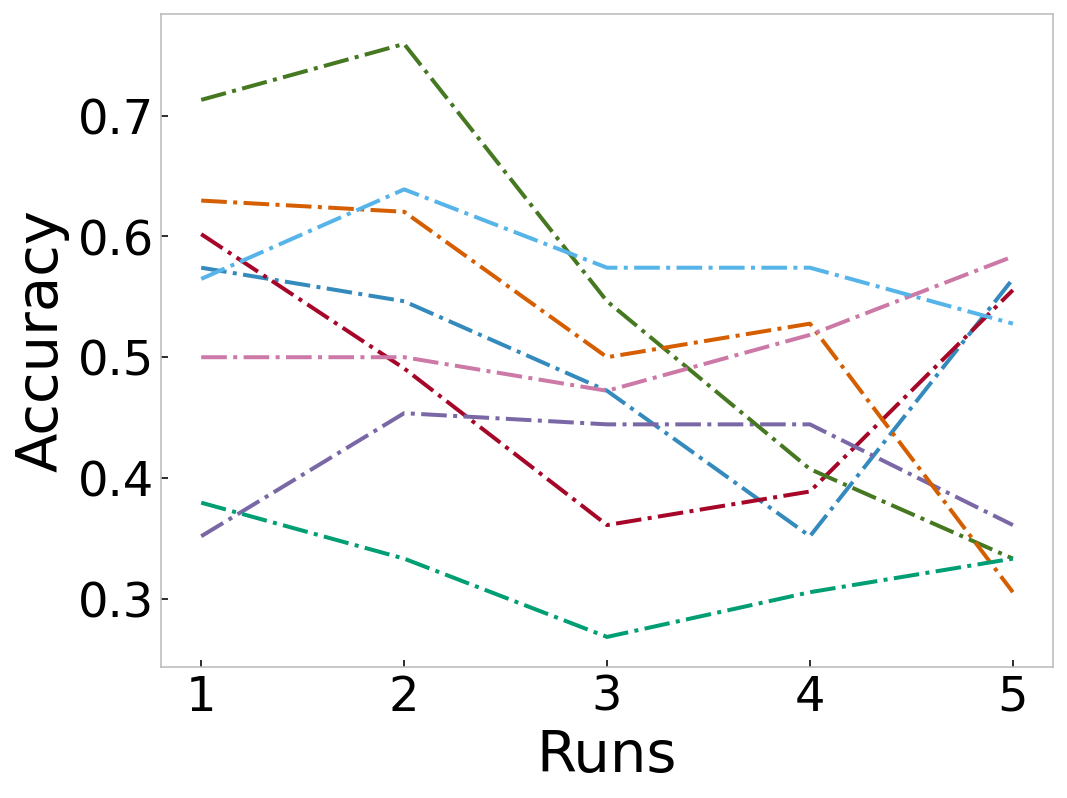

In [37]:
runs = [1,2,3,4,5]
for index, row in sum_srcdt.iterrows():
    b = sum_srcdt.Runs_SM[index]
    g= b.replace('[','')
    h = g.replace(']','')
    res = [float(idx) for idx in h.split(', ')]
    plt.plot(runs, res, label = "participant_%s"%pt, linestyle="-.")
plt.xlabel("Runs")
plt.ylabel("Accuracy")
plt.show()

In [25]:
b = sum_srcdt.Runs_SM[1]
g= b.replace('[','')
h = g.replace(']','')
res = [float(idx) for idx in h.split(', ')]
res

[0.6018518518518519,
 0.49074074074074076,
 0.3611111111111111,
 0.3888888888888889,
 0.5555555555555556]

In [28]:
type(res[1])

float

### Christine's suggestions:
4s presentation + 1s ITI fix
3.5 presentation + 1.5s longer add in a response for imagination fixation
break it down by the threat and safe conditions
copresentation and disappearance

### src val concat

In [13]:
sumdata_dir = '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/'

In [17]:
SMdir_ext = [f for f in listdir(sumdata_dir)]
SMpt_dir_lst = []
for i in SMdir_ext:
    if 'ptSM_summary' in i:
        pt_dir = sumdata_dir + i
        SMpt_dir_lst.append(pt_dir)

In [19]:
SMpt_dir_lst

['/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/23.0_ptSM_summary.csv',
 '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/24.0_ptSM_summary.csv',
 '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/25.0_ptSM_summary.csv',
 '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/26.0_ptSM_summary.csv',
 '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/27.0_ptSM_summary.csv',
 '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/28.0_ptSM_summary.csv',
 '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/29.0_ptSM_summary.csv',
 '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/30.0_ptSM_summary.csv',
 '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/31.0_ptSM_summary.csv']

In [22]:
SMpt_df = []
for b in SMpt_dir_lst:
    dt = pd.DataFrame(pd.read_csv(b, header = 0))
    dt.columns = dt.columns.str.replace(".", "_")
    SMpt_df.append(dt)
allSM_df = pd.concat(SMpt_df)

In [27]:
allSM_df.columns

Index(['Unnamed: 0', 'test_object', 'correct_context', 'tested_valence',
       'same_val', 'opp_val', 'same_foil', 'opp_foil', 'test1_thisRepN',
       'test1_thisTrialN', 'test1_thisN', 'test1_thisIndex', 'text_9_started',
       'key_resp_6_started', 'key_resp_6_keys', 'key_resp_6_rt',
       'text_11_started', 'key_resp_7_started', 'key_resp_7_keys',
       'key_resp_7_rt', 'text_13_started', 'key_resp_8_started',
       'key_resp_8_keys', 'key_resp_8_rt', 'text_12_started',
       'text_12_stopped', 'text_started', 'text_stopped', 'object_cue_started',
       'correct_cntxt_started', 'foil_same_started', 'foil_opp_started',
       'key_resp_started', 'corrAns', 'samekey', 'oppkey', 'key_resp_keys',
       'key_resp_corr', 'key_resp_rt', 'text_4_started', 'session',
       'participant', 'date', 'expName', 'psychopyVersion', 'frameRate',
       'Unnamed: 45', 'run_num', 'Unnamed: 41', 'run_sm', 'allrun_src',
       'text_4_stopped', 'Unnamed: 42'],
      dtype='object')

In [31]:
shrtSM_df = pd.DataFrame({ 
                        'participant': allSM_df.participant,
                        'tested_val': allSM_df.tested_valence,
                        'accuracy': allSM_df.corrAns,
                        'samekey': allSM_df.samekey,
                        'oppkey': allSM_df.oppkey,
                        'resp': allSM_df.key_resp_keys,
                        'rt': allSM_df.key_resp_rt})

In [32]:
shrtSM_df

,participant,tested_val,accuracy,samekey,oppkey,resp,rt
0,23.0,SAFE,1.0,2.0,3.0,1.0,3.044105
1,23.0,THREAT,1.0,2.0,3.0,1.0,3.928873
2,23.0,SAFE,2.0,3.0,1.0,1.0,2.654941
3,23.0,THREAT,2.0,3.0,1.0,1.0,3.931600
4,23.0,THREAT,1.0,2.0,3.0,2.0,3.621356
...,...,...,...,...,...,...,...
319,31.0,SAFE,1.0,2.0,3.0,3.0,4.779412
320,31.0,SAFE,2.0,3.0,1.0,1.0,1.847071
321,31.0,THREAT,2.0,3.0,1.0,2.0,3.776071
322,31.0,THREAT,2.0,3.0,1.0,1.0,3.558948


In [42]:
corr_safe = []
corr_threat = []

pt1 = allSM_df.loc[allSM_df['participant'] == 23]
pt2 = allSM_df.loc[allSM_df['participant'] == 24]
pt3 = allSM_df.loc[allSM_df['participant'] == 25]
pt4 = allSM_df.loc[allSM_df['participant'] == 26]
pt5 = allSM_df.loc[allSM_df['participant'] == 27]
pt6 = allSM_df.loc[allSM_df['participant'] == 28]
pt7 = allSM_df.loc[allSM_df['participant'] == 29]
pt8 = allSM_df.loc[allSM_df['participant'] == 30]

all_pts = [pt1, pt2, pt3, pt4, pt5]

In [44]:
for pt in all_pts:
    ptdf = pd.DataFrame(pt)

In [66]:
pt = pt1

In [86]:
corr_safe1 = []
corr_threat1 = []

corr_safe2 = []
corr_threat2 = []

corr_safe3 = []
corr_threat3 = []

corr_safe4= []
corr_threat4 = []

corr_safe5 = []
corr_threat5 = []

corr_safe6 = []
corr_threat6 = []

corr_safe7 = []
corr_threat7 = []

corr_safe8 = []
corr_threat8 = []

In [87]:
corr_safe1 = []
corr_threat1 = []

for index, row in pt1.iterrows():
    if pt1.tested_valence[index] == 'SAFE' and pt1.key_resp_corr[index]:
        corr_safe1.append(1)
    if pt1.tested_valence[index] == 'THREAT' and pt1.key_resp_corr[index]:
        corr_threat1.append(1)

In [88]:
for index, row in pt2.iterrows():
    if pt2.tested_valence[index] == 'SAFE' and pt2.key_resp_corr[index]:
        corr_safe2.append(1)
    if pt1.tested_valence[index] == 'THREAT' and pt2.key_resp_corr[index]:
        corr_threat2.append(1)

In [89]:
for index, row in pt3.iterrows():
    if pt3.tested_valence[index] == 'SAFE' and pt3.key_resp_corr[index]:
        corr_safe3.append(1)
    if pt3.tested_valence[index] == 'THREAT' and pt3.key_resp_corr[index]:
        corr_threat1.append(1)

In [90]:
for index, row in pt4.iterrows():
    if pt4.tested_valence[index] == 'SAFE' and pt4.key_resp_corr[index]:
        corr_safe4.append(1)
    if pt1.tested_valence[index] == 'THREAT' and pt4.key_resp_corr[index]:
        corr_threat4.append(1)

In [91]:
for index, row in pt5.iterrows():
    if pt5.tested_valence[index] == 'SAFE' and pt5.key_resp_corr[index]:
        corr_safe5.append(1)
    if pt5.tested_valence[index] == 'THREAT' and pt5.key_resp_corr[index]:
        corr_threat5.append(1)

In [92]:
for index, row in pt6.iterrows():
    if pt6.tested_valence[index] == 'SAFE' and pt6.key_resp_corr[index]:
        corr_safe6.append(1)
    if pt6.tested_valence[index] == 'THREAT' and pt6.key_resp_corr[index]:
        corr_threat6.append(1)

In [93]:
for index, row in pt7.iterrows():
    if pt7.tested_valence[index] == 'SAFE' and pt7.key_resp_corr[index]:
        corr_safe7.append(1)
    if pt7.tested_valence[index] == 'THREAT' and pt7.key_resp_corr[index]:
        corr_threat7.append(1)

In [94]:
for index, row in pt8.iterrows():
    if pt8.tested_valence[index] == 'SAFE' and pt8.key_resp_corr[index]:
        corr_safe8.append(1)
    if pt8.tested_valence[index] == 'THREAT' and pt8.key_resp_corr[index]:
        corr_threat8.append(1)